use Tree when 
- Categorical features with complex rules
- Non-linear relationships
- Interpretability is important
- Feature interactions

creates human readable rules like:
```plaintext
if feature1 > 5:
    if feature2 < 3:
        return class A
    else:
        return class B
else:
    return class C
```


In [24]:
import pandas as pd
df = pd.read_csv('salaries.csv')

In [25]:
df.head()

,company,job,degree,salary_more_then_100k
0,google,sales executive,bachelors,0
1,google,sales executive,masters,0
2,google,business manager,bachelors,1
3,google,business manager,masters,1
4,google,computer programmer,bachelors,0


In [26]:
inputs = df.drop('salary_more_then_100k', axis=1)
outputs = df['salary_more_then_100k']

In [27]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for column in inputs.columns:
    if inputs[column].dtype == 'object':
        inputs[column] = le.fit_transform(inputs[column])

In [28]:
inputs

,company,job,degree
0,2,2,0
1,2,2,1
2,2,0,0
3,2,0,1
4,2,1,0
5,2,1,1
6,0,2,1
7,0,1,0
8,0,0,0
9,0,0,1


In [29]:
from sklearn import tree
model = tree.DecisionTreeClassifier()

In [30]:
model.fit(inputs, outputs)

DecisionTreeClassifier()

In [31]:
model.score(inputs, outputs)

1.0

In [32]:
model.predict([[2,1,0]]) #Google, Computer Engineer, Bachelors degree > 100 k?

e:\Summer_2025\ML_Py\ml_env\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [33]:
model.predict([[2,1,1]]) #Google, Computer Engineer, Masters degree > 100 k ?

e:\Summer_2025\ML_Py\ml_env\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

[Text(0.4, 0.9166666666666666, 'company <= 0.5\ngini = 0.469\nsamples = 16\nvalue = [6, 10]\nclass = >100k'),
 Text(0.2, 0.75, 'degree <= 0.5\ngini = 0.375\nsamples = 4\nvalue = [3, 1]\nclass = <=100k'),
 Text(0.30000000000000004, 0.8333333333333333, 'True  '),
 Text(0.1, 0.5833333333333334, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]\nclass = <=100k'),
 Text(0.3, 0.5833333333333334, 'job <= 1.0\ngini = 0.5\nsamples = 2\nvalue = [1, 1]\nclass = <=100k'),
 Text(0.2, 0.4166666666666667, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = >100k'),
 Text(0.4, 0.4166666666666667, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = <=100k'),
 Text(0.6, 0.75, 'company <= 1.5\ngini = 0.375\nsamples = 12\nvalue = [3, 9]\nclass = >100k'),
 Text(0.5, 0.8333333333333333, '  False'),
 Text(0.5, 0.5833333333333334, 'gini = 0.0\nsamples = 6\nvalue = [0, 6]\nclass = >100k'),
 Text(0.7, 0.5833333333333334, 'job <= 0.5\ngini = 0.5\nsamples = 6\nvalue = [3, 3]\nclass = <=100k'),
 Text(0.6, 0.4166666666666667, '

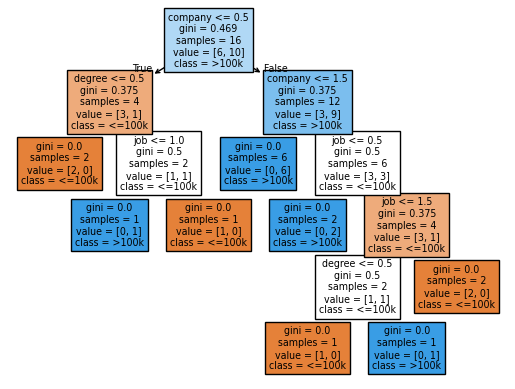

In [38]:
tree.plot_tree(model, feature_names=inputs.columns, class_names=['<=100k', '>100k'], filled=True)


trying what differences we see if we redo this exercise with logistic regression

In [34]:
from sklearn.linear_model import LogisticRegression
model_log = LogisticRegression()

In [35]:
model_log.fit(inputs, outputs)

LogisticRegression()

In [36]:
model_log.score(inputs, outputs)

0.75

In [37]:
# Check for overfitting
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(inputs, outputs, test_size=0.3)

# Decision Tree
dt_model = tree.DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
print(f"Decision Tree - Train: {dt_model.score(X_train, y_train):.3f}")
print(f"Decision Tree - Test: {dt_model.score(X_test, y_test):.3f}")

# Logistic Regression  
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
print(f"Logistic Regression - Train: {lr_model.score(X_train, y_train):.3f}")
print(f"Logistic Regression - Test: {lr_model.score(X_test, y_test):.3f}")

Decision Tree - Train: 1.000
Decision Tree - Test: 0.600
Logistic Regression - Train: 0.818
Logistic Regression - Test: 0.600


### Exweercise


### Decision Trees Excel At:
- **Medical diagnosis** (symptoms → disease)
- **Credit approval** (categorical risk factors)
- **Marketing campaigns** (demographics → response)
- **Fraud detection** (transaction patterns)
- **Employee retention** (job satisfaction factors)

### Logistic Regression Excel At:
- **A/B testing** (continuous metrics → conversion)
- **Financial modeling** (ratios → default risk)
- **Sports analytics** (player stats → win probability)
- **Marketing attribution** (ad spend → sales)
- **Medical trials** (dosage → recovery probability)






## Bottom Line Decision Matrix

| Dataset Characteristic | Decision Tree | Logistic Regression |
|----------------------|---------------|-------------------|
| **Categorical features** | ✅ Excellent | ⚠️ Needs encoding |
| **Numerical features** | ✅ Good | ✅ Excellent |
| **Mixed features** | ✅ Excellent | ⚠️ Needs preprocessing |
| **Small dataset** | ⚠️ Overfits easily | ✅ More stable |
| **Large dataset** | ✅ Excellent | ✅ Excellent |
| **Interpretability** | ✅ Clear rules | ✅ Feature weights |
| **Non-linear patterns** | ✅ Natural | ❌ Needs feature engineering |
| **Probability estimates** | ⚠️ Can be unstable | ✅ Well-calibrated |
